In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('LyricsCV.csv')
df_t = pd.DataFrame(TfidfTransformer().fit_transform(df).toarray(), columns=df.columns)
label = pd.read_csv('lyrics_processed.csv')['hit']
df_t

,afraid,aliv,allah,alon,alreadi,alright,alway,angel,anoth,answer,...,wonder,word,work,world,worri,write,wrong,yeah,year,young
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.204201,0.000000,0.076755,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.049044,0.000000,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.098855,0.0,0.0,0.0,0.0,0.000000,0.062753,0.000000,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.416135,0.0,0.0,0.0,0.0,0.000000,0.000000,0.112594,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.070135,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20319,0.0,0.0,0.0,0.11921,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.062285,0.000000,0.000000,0.0
20320,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.054335,0.0,...,0.0,0.054692,0.0,0.0,0.0,0.0,0.000000,0.867968,0.000000,0.0
20321,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.088289,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.128644,0.000000,0.0
20322,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.032117,0.000000,0.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_t, label, test_size=0.2, random_state=42)
print('Training set dim:', X_train.shape)
print('Testing set dim:', X_test.shape)

Training set dim: (16259, 403)
Testing set dim: (4065, 403)


In [4]:
def performance(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    print('Sensitivity : ', TP/(TP+FN))
    print('Specificity : ', TN/(TN+FP))
    print('Precision : ', TP/(TP+FP))
    print('Negative predictive value : ', TN/(TN+FN))
    print('False positive rate : ', FP/(FP+TN))
    print('False negative rate : ', FN/(TP+FN))
    print('False discovery rate : ', FP/(TP+FP))
    print('Accuracy : ', (TP+TN)/(TP+FP+FN+TN) )

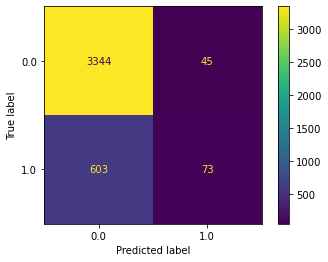

In [5]:
nb_clf = MultinomialNB()

nb_clf.fit(X_train, y_train)


pred = nb_clf.predict(X_test)

plot_confusion_matrix(nb_clf, X_test, y_test)

In [6]:
performance(confusion_matrix(y_test, pred))

Sensitivity :  0.10798816568047337
Specificity :  0.9867217468279729
Precision :  0.6186440677966102
Negative predictive value :  0.8472257410691665
False positive rate :  0.013278253172027146
False negative rate :  0.8920118343195266
False discovery rate :  0.3813559322033898
Accuracy :  0.8405904059040591


In [7]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      3389
         1.0       0.62      0.11      0.18       676

    accuracy                           0.84      4065
   macro avg       0.73      0.55      0.55      4065
weighted avg       0.81      0.84      0.79      4065



In [8]:
nonhit_prob_sorted = nb_clf.feature_log_prob_[0, :].argsort()[::-1]
hit_prob_sorted = nb_clf.feature_log_prob_[1, :].argsort()[::-1]

print(np.take(df.columns, nonhit_prob_sorted[:15]))
print(np.take(df.columns, hit_prob_sorted[:15]))

Index(['love', 'know', 'like', 'yeah', 'come', 'time', 'feel', 'want', 'make',
       'caus', 'babi', 'wanna', 'need', 'life', 'heart'],
      dtype='object')
Index(['yeah', 'like', 'know', 'nigga', 'love', 'babi', 'bitch', 'girl',
       'wanna', 'want', 'caus', 'make', 'shit', 'fuck', 'time'],
      dtype='object')


In [9]:
top_words = np.union1d(np.take(df.columns, nonhit_prob_sorted[:15]),
                       np.take(df.columns, hit_prob_sorted[:15]))

/var/folders/lv/snv97l992c5ctbbxj96wt76w0000gn/T/ipykernel_6920/3562386373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['hit'] = label


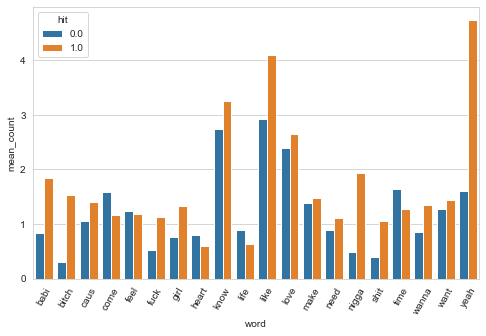

In [11]:
sns.set_style("whitegrid")
top = df[list(top_words)]
top['hit'] = label
df_melted = pd.melt(top.groupby('hit').mean().T.reset_index(), id_vars=['index'], value_vars=[0.0,1.0])
df_melted.columns = ['word','hit','mean_count']
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(data=df_melted, x='word', y='mean_count', hue='hit')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()